<a href="https://colab.research.google.com/github/punch-bob/MathStatCalcTask/blob/main/MathStatCalcTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\text{First:}$

In [1]:
#!pip install ipympl

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import math
from scipy.stats import norm
from scipy.stats.distributions import chi2, t

In [4]:
task1Data = [-1.135, -0.592, -0.766, -1.177, -0.735, -1.717, 0.336, -1.140, -0.155, -2.048,
             -1.137, -2.147, -0.313, -0.056, -0.286, -0.829, -0.290, -0.639, -1.397, 0.362,
             -0.393, -1.347, -0.185, -0.715, -1.846, -0.038, -1.242, -0.387, -0.669, -0.997,
             -2.424, -1.103, -0.843, -0.552, -1.283, -1.026, -1.448, -0.231, -0.267, -0.769,
             -0.341, -1.874, -1.213, -2.168, -2.116, -0.886, -1.061, -0.937, 0.576, -0.636]
n1 = len(task1Data)
sigma = 0.5
alpha = -1

In [5]:
def getSampleMean():
  sampleMean = 0
  for number in task1Data:
    sampleMean += number
  return sampleMean / n1

In [6]:
def getSampleVariance(mathExpectation):
  sampleVarience = 0
  for number in task1Data:
    sampleVarience += (number - mathExpectation)**2
  return sampleVarience / n1

In [7]:
def getUnbiasedSampleVariance(mathExpectation):
  sampleVariance = getSampleVariance(mathExpectation)
  return sampleVariance * n1 / (n1 - 1)

##$\text{Сonfidence intervals:}$

###$\text{a) for} \space\space \alpha, \text{ if }\space \sigma^2 \space  \text{known;}$

$$№1$$
$$$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$
$\text{a) }\overline{X} \sim N_{\alpha, \frac{\sigma^2}{n}}$

$G(\overline{X}, \alpha) = \frac{\overline{X} - \alpha}{\sqrt{\frac{\sigma^2}{n}}} \sim N_{0, 1} \text{ (Theorem on the properties of normal samples)}$

$P(\alpha^{-} \leq \sqrt{n}\frac{(\overline{X} - \alpha)}{\sigma} \leq \alpha^{+}) = 1 - \varepsilon$

\begin{cases}
    \phi_{0,1}(\alpha^{-}) = \frac{\varepsilon}{2}\\
    \phi_{0,1}(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}

\begin{cases}
    \alpha^{-} = -\tau_{1 - \frac{\varepsilon}{2}}\\
    \alpha^{+} = \tau_{1 - \frac{\varepsilon}{2}}
\end{cases}

$P(-\tau_{1 - \frac{\varepsilon}{2}} \leq \sqrt{n}\frac{(\overline{X} - \alpha)}{\sigma} \leq \tau_{1 - \frac{\varepsilon}{2}}) = 1 - \varepsilon$

$P(\overline{X} - \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}} \leq \alpha \leq \overline{X} + \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}}) = 1 - \varepsilon$

$\text{Confidence interval for }\alpha\text{, with a known } \sigma^2:$

$$(\overline{X} - \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}};\overline{X} + \frac{\sigma\tau_{1 - \frac{\varepsilon}{2}}}{\sqrt{n}})$$



In [8]:
def buildConfidenceIntervalA():
  sampleMean = getSampleMean()
  alphaPlusArray = [norm.ppf(0.995), norm.ppf(0.975), norm.ppf(0.95)]
  
  for alphaPlus in alphaPlusArray:
    leftBorder = sampleMean - math.sqrt(sigma) * alphaPlus / math.sqrt(n1)
    rightBorder = sampleMean + math.sqrt(sigma) * alphaPlus / math.sqrt(n1)
    print(f"({round(leftBorder, 3)} ; {round(rightBorder, 3)})")

###$\text{b) for} \space\space \alpha, \text{ if }\space \sigma^2 \space  \text{unknown;}$

$$№1$$
$$$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$

$\text{b) }\overline{X} \sim N_{\alpha, \frac{\sigma^2}{n}}$

$G(\overline{X}, \alpha) = \frac{(\overline{X} - \alpha)\sqrt{n}}{S_0} \sim T_{n - 1}\text{ (Theorem on the properties of normal samples),   }S_0 = \sqrt{S_0^2}$

\begin{cases}
    T_{n - 1}(\alpha^{-}) = \frac{\varepsilon}{2}\\
    T_{n - 1}(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}
$$\alpha^{+} = - \alpha^{-}$$

$P(-\alpha^{+} \leq \frac{(\overline{X} - \alpha)\sqrt{n}}{S_0} \leq \alpha^{+}) = 1 - \varepsilon$

$P(\overline{X} - \frac{\alpha^{+} S_0}{\sqrt{n}} \leq \alpha \leq \overline{X} + \frac{\alpha^{+} S_0}{\sqrt{n}}) = 1 - \varepsilon$

$\text{Confidence interval for }\alpha\text{, with a unknown } \sigma^2:$

$$(\overline{X} - \frac{\alpha^{+} S_0}{\sqrt{n}};\overline{X} + \frac{\alpha^{+} S_0}{\sqrt{n}})$$

In [9]:
def buildConfidenceIntervalB():
  sampleMean = getSampleMean()
  unbiasedSampleVariance = getUnbiasedSampleVariance(sampleMean)
  alphaPlusArray = [t.ppf(0.995, n1 - 1), t.ppf(0.975, n1 - 1), t.ppf(0.95, n1 - 1)]
  for alphaPlus in alphaPlusArray:
    leftBorder = sampleMean - alphaPlus * math.sqrt(unbiasedSampleVariance) / math.sqrt(n1)
    rightBorder = sampleMean + alphaPlus * math.sqrt(unbiasedSampleVariance) / math.sqrt(n1)
    print(f"({round(leftBorder, 3)} ; {round(rightBorder, 3)})")

###$\text{c) for} \space\space \sigma^2, \text{ if }\space \alpha \space  \text{known;}$

$$№1$$
$$$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$

$\text{c) }\frac{X_i - \alpha}{\sigma} \sim N_{0, 1}$

$G(S, \sigma^2) = \sum \limits_{i = 1}^n (\frac{X_i - \alpha}{\sigma})^2 \sim \chi_n^2 $

$P(\alpha^{-} \leq \sum \limits_{i = 1}^n (\frac{X_i - \alpha}{\sigma})^2 \leq \alpha^{+}) = 1 - \varepsilon$

\begin{cases}
    \chi_n^2(\alpha^{-}) = \frac{\varepsilon}{2}\\
    \chi_n^2(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}

$P(\frac{\sum \limits_{i = 1}^n (X_i - \alpha)^2}{\alpha^{+}} \leq \sigma^2 \leq \frac{\sum \limits_{i = 1}^n (X_i - \alpha)^2}{\alpha^{-}}) = 1 - \varepsilon$

$\text{Confidence interval for }\sigma^2\text{, with a known } \alpha:$

$$\Biggl( \frac{\sum \limits_{i = 1}^n (X_i - \alpha)^2}{\alpha^{+}};\frac{\sum \limits_{i = 1}^n (X_i - \alpha)^2}{\alpha^{-}} \Biggl)$$

In [10]:
def buildConfidenceIntervalC():
  S = getSampleVariance(alpha)
  alphaPlusArray = [chi2.ppf(0.995, df = n1), chi2.ppf(0.975, df = n1), chi2.ppf(0.95, df = n1)]
  alphaMinusArray = [chi2.ppf(0.005, df = n1), chi2.ppf(0.025, df = n1), chi2.ppf(0.05, df = n1)]
  for i in range(3):
    leftBorder = n1 * S / alphaPlusArray[i]
    rightBorder = n1 * S / alphaMinusArray[i]
    print(f"({round(leftBorder, 3)} ; {round(rightBorder, 3)})")

###$\text{d) for} \space\space \sigma^2, \text{ if }\space \alpha \space  \text{unknown;}$

$$№1$$
$$$$
$$\vec{X} \sim N_{\alpha, \sigma^2}$$
$\text{d) }S^2 = \frac{1}{n}\sum \limits_{i = 1}^n (X_i - \overline{X})^2$

$G(S^2, \sigma^2) = \frac{nS^2}{\sigma^2} \sim \chi_{n-1}^2 \text{ (Theorem on the properties of normal samples)}$

$P(\alpha^{-} \leq \frac{nS^2}{\sigma^2} \leq \alpha^{+}) = 1 - \varepsilon$

\begin{cases}
    \chi_{n - 1}^2(\alpha^{-}) = \frac{\varepsilon}{2}\\
    \chi_{n - 1}^2(\alpha^{+}) = 1 - \frac{\varepsilon}{2}
\end{cases}

$P(\frac{nS^2}{\alpha^{+}} \leq \sigma^2 \leq \frac{nS^2}{\alpha^{-}}) = 1 - \varepsilon$

$\text{Confidence interval for }\sigma^2\text{, with a unknown } \alpha:$

$$(\frac{nS^2}{\alpha^{+}};\frac{nS^2}{\alpha^{-}})$$

In [11]:
def buildConfidenceIntervalD():
  sampleMean = getSampleMean()
  sampleVariance = getSampleVariance(sampleMean)
  alphaPlusArray = [chi2.ppf(0.995, df = n1 - 1), chi2.ppf(0.975, df = n1 - 1), chi2.ppf(0.95, df = n1 - 1)]
  alphaMinusArray = [chi2.ppf(0.005, df = n1 - 1), chi2.ppf(0.025, df = n1 - 1), chi2.ppf(0.05, df = n1 - 1)]
  for i in range(3):
    leftBorder = n1 * sampleVariance / alphaPlusArray[i]
    rightBorder = n1 * sampleVariance / alphaMinusArray[i]
    print(f"({round(leftBorder, 3)} ; {round(rightBorder, 3)})")

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import kstwobign as klm

#$\text{Second:}$

In [13]:

task2Data = [0.041, 0.234, 0.279, 0.654, 0.297, 0.667, 0.044, 0.701, 0.710, 0.952,
             0.298, 0.795, 0.618, 0.377, 0.222, 0.269, 0.626, 0.348, 0.503, 0.630,
             0.335, 0.975, 0.973, 0.169, 0.596, 0.288, 0.353, 0.124, 0.530, 0.239]
a = 0
b = 1
n2 = len(task2Data)
epsilon = 0.05

##$\text{a) Empirical function and histogram;}$

$$№2$$
$$$$
$$\vec{X} \sim U_{[0,1]}$$

$\text{a) Empirical function:}$

$$F_n^*(t) = \frac{1}{n}\sum \limits_{i = 1}^nI(X_i < t),\space\space I(A) = 
\begin{cases}
  1, w \in A\\
  0, w \notin A
\end{cases}$$

In [14]:
def drawEmpiricalFunction():
  sns.ecdfplot(data = task2Data, c = "green")
  plt.show()

In [15]:
def drawHistogram():
  plt.hist(task2Data, density = True, edgecolor = "black", color = "green", bins = int(math.log2(n2) + 1))
  plt.show()

##$\text{b) Kolmogorov criterion;}$

$$№2$$
$$$$
$$\vec{X} \sim U_{[0,1]}, \space\space H_o = \{U_{[0, 1]}\} \space (\text{simple hypothesis})$$

$\text{b) Kolmogorov distance:}$

$$d(F_n^*(t), F_o(t)) = \underset{t \in \mathbb{R}}{sup}|F_n^*(t) - F_o(t)|$$

$\text{Kolmogorov's criterion:}$

$$P(\sqrt{n}\space d < c) \simeq K(c) = 1 - \varepsilon, \space\space c > 0$$

$$\delta = 
\begin{cases}
  0, \sqrt{n}\space d < c\\
  1, \sqrt{n}\space d \geq c
\end{cases}, \space\space K(c) = 1 - \varepsilon$$

In [16]:
def indicator(number, t):
  return number < t

In [17]:
def empiricalFunc(t):
  sum = 0
  for number in task2Data:
    sum += indicator(number, t)
  return sum / n2

In [18]:
def drawKolmogorovCriterion():
  sns.ecdfplot(data = task2Data, c = "green")
  x = [0, 1]
  y = [0, 1]
  temp_df = pd.DataFrame(x, y)
  sns.lineplot(data = temp_df)
  plt.show()

In [19]:
def kolmogorovCriterion():
  x = np.linspace(0, 1, 10000)
  y = lambda x: empiricalFunc(x)
  z = lambda x: x

  point = 0
  d = 0

  for t in task2Data:
    if (d < abs(y(t) - z(t))):
      d = abs(y(t) - z(t))
      point = t 
  print("Kolmogorov distance : ", round(d, 3))
  print("Point : ", round(point, 3))

  c = klm.ppf(1 - epsilon)
  if (math.sqrt(n2) * d < c):
    print("The hypothesis is correct!")
  else:
    print("The hypothesis is incorrect!")

##$\text{c)} \space \chi^2 \space \text{criterion;}$ 

$$№2$$
$$\vec{X} \sim U_{[0, 1]},\space H_o = {\{U_{[0, 1]}\}}\space\text{(simple hypotesis)}$$
$\text{c)}\space\chi^2 \space \text{distance:}$

$$d(F_n^*, F_o) = \sum_\limits{j = 1}^k \frac{(\nu_j - np_j)^2}{np_j},$$ 

$$\nu_j = \sum_\limits{i = 1}^nI(X_i \in \Delta_j),$$

$$(\Delta_1,\space\cdots\space,\Delta_k),\space \Delta_j = [t_j\space;\space t_{j + 1})$$

$$p_j = P_{H_o}(X_i \in \Delta_j) = F_o(t_{j+1}) - F_o(t_j),$$

$\chi^2 \space \text{criterion:}$

$$\delta = 
\begin{cases}
  0, d(F_n^*, F_o) < c\\
  1, d(F_n^*, F_o) \geq c
\end{cases}, \space\space \chi_{k - 1}^2(c) = 1 - \varepsilon$$

In [20]:
def chiSquareCriterion():
  k = 5
  delta = [0, 0.2, 0.4, 0.6, 0.8, 1]
  p = [0.2, 0.2, 0.2, 0.2, 0.2]
  c = chi2.ppf(1 - epsilon, k - 1)
  nu = [0, 0, 0, 0, 0]
  for j in range(k):
    for number in task2Data:
      if (number > delta[j] and number < delta[j + 1]):
        nu[j] += 1

  d = 0
  for j in range(k):
    d += ((nu[j] - n2 * p[j]) ** 2) / (n2 * p[j])
  
  print("'Chi-square' distance = ", round(d, 3))

  if (d < c):
    print("The hypothesis is correct!")
  else:
    print("The hypothesis is incorrect!")


#$\text{Third:}$

In [21]:
from scipy.stats.distributions import f

In [22]:
task3_1Data = [-1.135, -0.592, -0.766, -1.177, -0.735, -1.717, 0.336, -1.140, -0.155, -2.048,
               -1.137, -2.147, -0.313, -0.056, -0.286, -0.829, -0.290, -0.639, -1.397, 0.362]

task3_2Data = [-0.393, -1.347, -0.185, -0.715, -1.846, -0.038, -1.242, -0.387, -0.669, -0.997,
               -2.424, -1.103, -0.843, -0.552, -1.283, -1.026, -1.448, -0.231, -0.267, -0.769,
               -0.341, -1.874, -1.213, -2.168, -2.116, -0.886, -1.061, -0.937, 0.576, -0.636]
               
n3_1 = len(task3_1Data)
n3_2 = len(task3_2Data)

##$\text{a) Testing the hypothesis of matching variances (Fisher's criterion);}$

$$№3$$
$$$$
$$\text{a)} \space \left. \begin{gathered}
  \vec{X} \sim N_{\alpha_1, \sigma_1^2}\\
  \vec{Y} \sim N_{\alpha_2, \sigma_2^2}
\end{gathered}\right\} \space \text{Independet}$$

$$H_o = \{\sigma_1^2 = \sigma_2^2\}$$

$\text{Fisher's criterion:}$

$$\begin{cases}
  \frac{nS^2(\vec{X})}{\sigma_1^2} \sim \chi_{n - 1}^2\\
  \frac{nS^2(\vec{Y})}{\sigma_2^2} \sim \chi_{m - 1}^2
\end{cases} \Longrightarrow
\frac{\frac{nS^2(\vec{X})}{\sigma_1^2(n - 1)}}{\frac{mS^2(\vec{Y})}{\sigma_2^2(m - 1)}} = \frac{S_0^2(\vec{X}) \sigma_2^2}{S_0^2(\vec{Y})\sigma_1^2} \sim F_{n - 1, m - 1}$$

$\text{Empirical significance of the Fisher criterion:}$

$$d = \frac{S_0^2(\vec{X})}{S_0^2(\vec{Y})} \space \stackrel{H_o}{\sim} \space F_{n - 1, m - 1}$$
$$$$
$$\delta = 
\begin{cases}
  0, \space f_1 < \frac{S_0^2(\vec{X})}{S_0^2(\vec{Y})} < f_2\\
  1, \space otherwise
\end{cases}$$
$$$$
$$\begin{cases}
  F_{n - 1, n - 2}(f_1) = \frac{\varepsilon}{2}\\
  F_{n - 1, n - 2}(f_2) = 1 - \frac{\varepsilon}{2}
\end{cases}$$

In [23]:
def varianceHypothesis():
  f1 = f.ppf(epsilon / 2, n3_1 - 1, n3_2 - 1)
  f2 = f.ppf(1 - epsilon / 2, n3_1 - 1, n3_2 - 1)
  print(epsilon)
  sampleMean1 = 0
  sampleMean2 = 0

  unbiasedSampleVariace1 = 0
  unbiasedSampleVariace2 = 0
  for number in task3_1Data:
    sampleMean1 += number / n3_1

  for number in task3_2Data:
    sampleMean2 += number / n3_2

  for number in task3_1Data:
    unbiasedSampleVariace1 += (number - sampleMean1) ** 2 / (n3_1 - 1)

  for number in task3_2Data:
    unbiasedSampleVariace2 += (number - sampleMean2) ** 2 / (n3_2 - 1)

    d = unbiasedSampleVariace1 / unbiasedSampleVariace2

  print("Empirical significance of the Fisher criterion = ", round(d, 3))

  if (f1 < d < f2):
    print("The variances are equal!")
  else:
    print("The variances are not equal!")


##$\text{b) Testing the hypothesis of the coincidence of mathematical expectations with the same variances (Student's criterion):}$

$$№3$$
$$$$
$$H_o = \{{\alpha_1 = \alpha_2\}}$$
$$\text{b)  Independet} \space
\begin{cases}
  \frac{nS^2(\vec{X})}{\sigma_1^2} \sim \chi_{n - 1}^2\\
  \frac{nS^2(\vec{Y})}{\sigma_2^2} \sim \chi_{m - 1}^2
\end{cases} \underset{\text{stable by} \sum}{\Longrightarrow} \frac{nS^2(\vec{X}) + mS^2(\vec{Y})}{(\sigma_1 = \sigma_2)^2} \sim \chi_{m + n - 2}^2$$

$$\overline{X} - \overline{Y} \sim N_{\alpha_1 - \alpha_2, \frac{\sigma^2}{n} + \frac{\sigma^2}{m}}$$

$$E(\overline{X} - \overline{Y}) = E(X_1) - E(Y_1) = \alpha_1 - \alpha_2$$

$$D(\overline{X} - \overline{Y}) \stackrel{independet}{=} D\overline{X} + D\overline{Y} = \frac{DX_1}{n} + \frac{DY_1}{m}$$
$$$$
$\text{Student's criterion:}$
$$$$
$$\frac{\frac{(\overline{X} - \overline{Y}) - (\alpha_1 - \alpha_2)}{\sqrt{\frac{\sigma^2}{n} + \frac{\sigma^2}{n}}}}{\sqrt{\frac{nS^2(\vec{X}) + mS^2(\vec{Y})}{\sigma^2(m + n - 2)}}} = \frac{\big((\overline{X} - \overline{Y}) - (\alpha_1 - \alpha_2)\big) \sqrt{(m + n - 2)mn}}{\sqrt{\big(nS^2(\vec{X} + mS^2(\vec{Y})\big)(n + m)}} \sim T_{n + m - 2}$$

$$d = \frac{\big((\overline{X} - \overline{Y}) - (\alpha_1 - \alpha_2)\big)\sqrt{(m + n - 2)mn}}{\sqrt{\big(nS^2(\vec{X}) + mS^2(\vec{Y}) \big) (n + m)}} \space\stackrel{H_o}{=}\space 
\frac{(\overline{X} - \overline{Y}) \sqrt{(m + n - 2)mn}}{\sqrt{\big(nS^2(\vec{X}) + mS^2(\vec{Y}) \big) (n + m)}} \sim T_{n + m - 2}$$

$$\delta = 
\begin{cases}
  0, |d| < t_{1 - \frac{\varepsilon}{2}}\\
  1, otherwise
\end{cases},\space T_{m + n - 2}(t_{1 - \frac{\varepsilon}{2}}) = 1 - \frac{\varepsilon}{2}$$

In [32]:
def mathExpectationHypothesis():
  sampleMean1 = 0
  sampleMean2 = 0

  sampleVariace1 = 0
  sampleVariace2 = 0

  for number in task3_1Data:
    sampleMean1 += number / n3_1

  for number in task3_2Data:
    sampleMean2 += number / n3_2

  for number in task3_1Data:
    sampleVariace1 += (number - sampleMean1) ** 2 / n3_1

  for number in task3_2Data:
    sampleVariace2 += (number - sampleMean2) ** 2 / n3_2

  d = (sampleMean1 - sampleMean2) * math.sqrt((n3_1 + n3_2 - 2) * n3_1 * n3_2) / math.sqrt((n3_1 * sampleVariace1 + n3_2 * sampleVariace2) * (n3_1 + n3_2))
  c = t.ppf(1 - epsilon / 2, n3_1 + n3_2 - 2)

  print("d = ", round(d, 3))

  if (abs(d) < c):
    print("The mathematical expectation are equal!")
  else:
    print("The mathematical expectation are not equal!")

In [25]:
from scipy.stats import norm
from scipy.stats.distributions import chi2
#chi2.ppf(0.005, df=49)
#norm.ppf(0.995)
#t.ppf(0.95, 49)
#klm.ppf(0.95)
chi2.ppf(0.95, 4)

9.487729036781154

In [26]:
print("Task #1")
print("====================")
print("A:")
buildConfidenceIntervalA()
print("====================")
print("B:")
buildConfidenceIntervalB()
print("====================")
print("C:")
buildConfidenceIntervalC()
print("====================")
print("D:")
buildConfidenceIntervalD()
print("====================")



Task #1
A:
(-1.143 ; -0.628)
(-1.082 ; -0.69)
(-1.05 ; -0.721)
B:
(-1.147 ; -0.624)
(-1.082 ; -0.69)
(-1.049 ; -0.722)
C:
(0.302 ; 0.857)
(0.336 ; 0.741)
(0.355 ; 0.69)
D:
(0.298 ; 0.856)
(0.332 ; 0.74)
(0.352 ; 0.688)


Task #2
Empirical function:


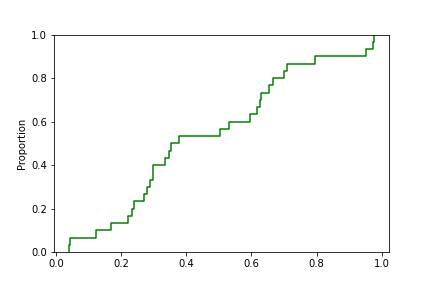

In [27]:
print("Task #2")
print("Empirical function:")
%matplotlib widget
drawEmpiricalFunction()


Histogram:


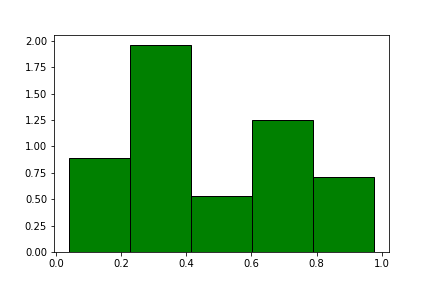

In [28]:
print("\nHistogram:")
%matplotlib widget
drawHistogram()

Kolmogorov's criterion graph:


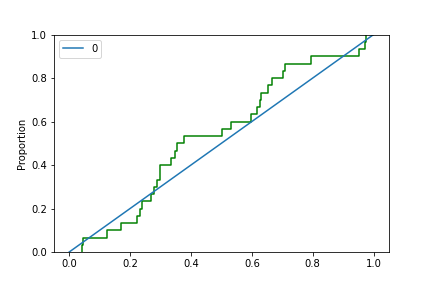

In [29]:
print("Kolmogorov's criterion graph:")
%matplotlib widget
drawKolmogorovCriterion()

In [30]:
varianceHypothesis()

0.05
Empirical significance of the Fisher criterion =  1.07
The variances are equal!


In [33]:
mathExpectationHypothesis()

d =  0.771
The mathematical expectation are equal!
